<a href="https://colab.research.google.com/github/Nidzoki/PMFSTIntroToDS/blob/main/w9/w9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

### 2025./2026.

# UVOD U PODATKOVNU ZNANOST
## **Domaća zadaća  9**
#### Zadaci za samostalan rad
</div>

# ***Zadatak 1: Grupiranje slika znamenki***

Učitajte podatke s:

```
from sklearn.datasets import load_digits
digits = load_digits()
```

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

### **Zadatak 1.1.**

Grupirajte slike znamenki koristeći ***64-dimenzionalne vektore piksela*** koji se nalaze u `digits.data`.


***Napomena:*** Prilikom kreiranja Kmeans modela koristite *random_state = 7*.
> Za **svaku nakupinu (cluster)**:
  * odredite koju znamenku predstavlja,
  * ispišite broj točno grupiranih, krivo grupiranih, ukupan broj znamenki u nakupini (usporedite stvarnu ciljanu vrijednost s labelom nakupine u koju je pojedinačna znamenka smještena),
  * izračunajte točnost Kmeans modela.

> *Hint:* Ne trebate dijeliti podatke na skup za treniranje i skup za testiranje - koristite cijeli skup za treniranje i cijeli skup za evaluaciju.


In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import mode



In [4]:
k_means = KMeans(n_clusters=10, random_state=7)
k_means.fit(digits.data)

KMeans(n_clusters=10, random_state=7)

In [5]:
digits_pca = PCA(n_components=2)
digits_pca.fit(digits.data)
pca_data = digits_pca.transform(digits.data)
pca_cluster_centers = digits_pca.transform(k_means.cluster_centers_)

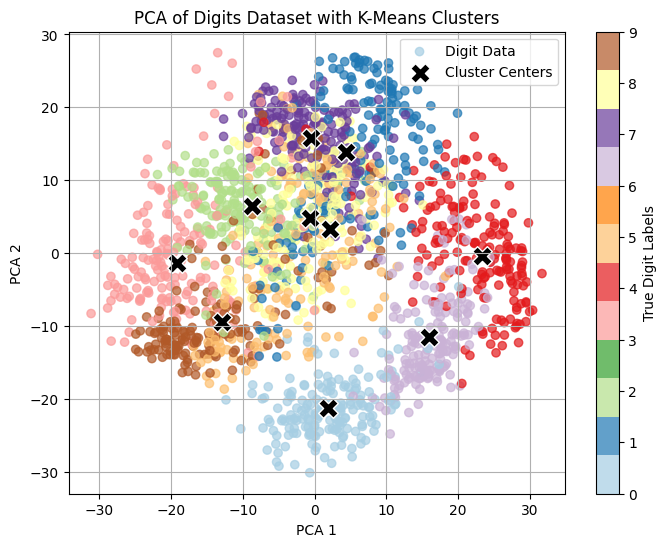

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=digits.target, cmap="Paired", alpha=0.7, label="Digit Data")
plt.colorbar(label="True Digit Labels")
plt.scatter(pca_cluster_centers[:, 0], pca_cluster_centers[:, 1], s=200, marker='X', c='black', label="Cluster Centers", edgecolors='white', linewidth=1)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA of Digits Dataset with K-Means Clusters")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
labels = k_means.labels_
true_labels = digits.target
n_clusters = k_means.n_clusters

cluster_to_digit_mapping = {}
for i in range(n_clusters):
    cluster_indices = np.where(labels == i)[0]
    true_digits_in_cluster = true_labels[cluster_indices]

    if len(true_digits_in_cluster) > 0:
        most_frequent_digit = mode(true_digits_in_cluster, keepdims=False).mode
        cluster_to_digit_mapping[i] = most_frequent_digit
    else:
        cluster_to_digit_mapping[i] = -1

print("Cluster to Digit Mapping (Majority Vote):")
for cluster_id, digit in cluster_to_digit_mapping.items():
    print(f"Cluster {cluster_id}: represents digit {digit}")




Cluster to Digit Mapping (Majority Vote):
Cluster 0: represents digit 7
Cluster 1: represents digit 8
Cluster 2: represents digit 9
Cluster 3: represents digit 0
Cluster 4: represents digit 1
Cluster 5: represents digit 4
Cluster 6: represents digit 2
Cluster 7: represents digit 5
Cluster 8: represents digit 3
Cluster 9: represents digit 6


In [8]:
correctly_grouped_total = 0
total_samples = len(true_labels)

print("\n--- Cluster Analysis ---")
for i in range(n_clusters):
    if i not in cluster_to_digit_mapping or cluster_to_digit_mapping[i] == -1:
        print(f"Cluster {i}: (empty or no majority digit assigned)")
        continue

    assigned_digit = cluster_to_digit_mapping[i]
    cluster_indices = np.where(labels == i)[0]
    true_digits_in_cluster = true_labels[cluster_indices]

    total_in_cluster = len(true_digits_in_cluster)
    correctly_grouped = np.sum(true_digits_in_cluster == assigned_digit)
    incorrectly_grouped = total_in_cluster - correctly_grouped

    correctly_grouped_total += correctly_grouped

    print(f"\nCluster {i} (represents digit {assigned_digit}):")
    print(f"  Total samples in cluster: {total_in_cluster}")
    print(f"  Correctly grouped as {assigned_digit}: {correctly_grouped}")
    print(f"  Incorrectly grouped: {incorrectly_grouped}")


--- Cluster Analysis ---

Cluster 0 (represents digit 7):
  Total samples in cluster: 198
  Correctly grouped as 7: 170
  Incorrectly grouped: 28

Cluster 1 (represents digit 8):
  Total samples in cluster: 226
  Correctly grouped as 8: 102
  Incorrectly grouped: 124

Cluster 2 (represents digit 9):
  Total samples in cluster: 242
  Correctly grouped as 9: 139
  Incorrectly grouped: 103

Cluster 3 (represents digit 0):
  Total samples in cluster: 179
  Correctly grouped as 0: 177
  Incorrectly grouped: 2

Cluster 4 (represents digit 1):
  Total samples in cluster: 91
  Correctly grouped as 1: 55
  Incorrectly grouped: 36

Cluster 5 (represents digit 4):
  Total samples in cluster: 166
  Correctly grouped as 4: 164
  Incorrectly grouped: 2

Cluster 6 (represents digit 2):
  Total samples in cluster: 176
  Correctly grouped as 2: 148
  Incorrectly grouped: 28

Cluster 7 (represents digit 5):
  Total samples in cluster: 157
  Correctly grouped as 5: 137
  Incorrectly grouped: 20

Cluster

In [9]:
kmeans_accuracy = correctly_grouped_total / total_samples
kmeans_correct_grouped = correctly_grouped_total
print(f"\n--- K-Means Model Accuracy ---")
print(f"Total samples: {total_samples}")
print(f"\nCorrectly grouped total: {kmeans_correct_grouped}")
print(f"\nOverall Accuracy: {kmeans_accuracy:.4f}")


--- K-Means Model Accuracy ---
Total samples: 1797

Correctly grouped total: 1424

Overall Accuracy: 0.7924


### **Zadatak 1.2.**

Grupirajte slike znamenki koristeći ***2-dimenzionalne t-SNE projekcije***.

***Napomena:*** Prilikom kreiranja TSNE modela te Kmeans modela koristite *random_state = 7*.
> Za **svaku nakupinu (cluster)**:
  * odredite koju znamenku predstavlja,
  * ispišite broj točno grupiranih, krivo grupiranih, ukupan broj znamenki u nakupini (usporedite stvarnu ciljanu vrijednost s labelom nakupine u koju je pojedinačna znamenka smještena),
  * izračunajte točnost Kmeans modela.


In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=7)

In [11]:
tsne_data = tsne.fit_transform(digits.data)

In [12]:
k_means.fit(tsne_data)

KMeans(n_clusters=10, random_state=7)

In [13]:
tsne_clusters = k_means.cluster_centers_

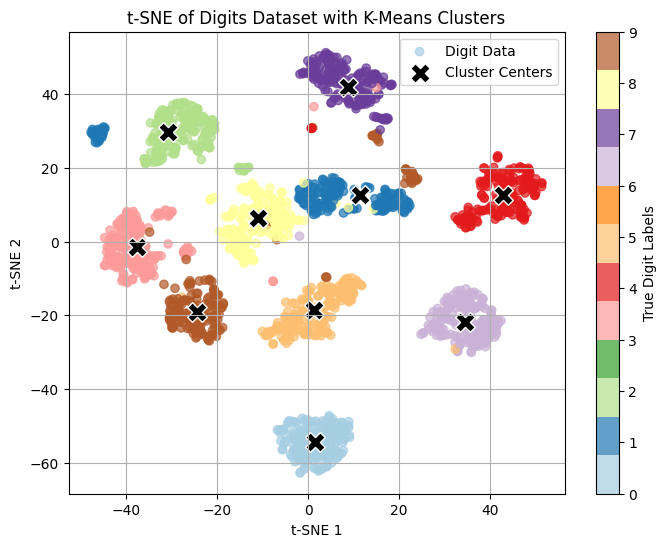

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=digits.target, cmap="Paired", alpha=0.7, label="Digit Data")
plt.colorbar(label="True Digit Labels")
plt.scatter(tsne_clusters[:, 0], tsne_clusters[:, 1], s=200, marker='X', c='black', label="Cluster Centers", edgecolors='white', linewidth=1)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of Digits Dataset with K-Means Clusters")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
labels = k_means.labels_
true_labels = digits.target
n_clusters = k_means.n_clusters

cluster_to_digit_mapping = {}
for i in range(n_clusters):
    cluster_indices = np.where(labels == i)[0]
    true_digits_in_cluster = true_labels[cluster_indices]

    if len(true_digits_in_cluster) > 0:
        most_frequent_digit = mode(true_digits_in_cluster, keepdims=False).mode
        cluster_to_digit_mapping[i] = most_frequent_digit
    else:
        cluster_to_digit_mapping[i] = -1

print("Cluster to Digit Mapping (Majority Vote):")
for cluster_id, digit in cluster_to_digit_mapping.items():
    print(f"Cluster {cluster_id}: represents digit {digit}")




Cluster to Digit Mapping (Majority Vote):
Cluster 0: represents digit 7
Cluster 1: represents digit 5
Cluster 2: represents digit 3
Cluster 3: represents digit 4
Cluster 4: represents digit 0
Cluster 5: represents digit 8
Cluster 6: represents digit 6
Cluster 7: represents digit 9
Cluster 8: represents digit 1
Cluster 9: represents digit 2


In [16]:
correctly_grouped_total = 0
total_samples = len(true_labels)

print("\n--- Cluster Analysis ---")
for i in range(n_clusters):
    if i not in cluster_to_digit_mapping or cluster_to_digit_mapping[i] == -1:
        print(f"Cluster {i}: (empty or no majority digit assigned)")
        continue

    assigned_digit = cluster_to_digit_mapping[i]
    cluster_indices = np.where(labels == i)[0]
    true_digits_in_cluster = true_labels[cluster_indices]

    total_in_cluster = len(true_digits_in_cluster)
    correctly_grouped = np.sum(true_digits_in_cluster == assigned_digit)
    incorrectly_grouped = total_in_cluster - correctly_grouped

    correctly_grouped_total += correctly_grouped

    print(f"\nCluster {i} (represents digit {assigned_digit}):")
    print(f"  Total samples in cluster: {total_in_cluster}")
    print(f"  Correctly grouped as {assigned_digit}: {correctly_grouped}")
    print(f"  Incorrectly grouped: {incorrectly_grouped}")


--- Cluster Analysis ---

Cluster 0 (represents digit 7):
  Total samples in cluster: 193
  Correctly grouped as 7: 179
  Incorrectly grouped: 14

Cluster 1 (represents digit 5):
  Total samples in cluster: 184
  Correctly grouped as 5: 180
  Incorrectly grouped: 4

Cluster 2 (represents digit 3):
  Total samples in cluster: 181
  Correctly grouped as 3: 179
  Incorrectly grouped: 2

Cluster 3 (represents digit 4):
  Total samples in cluster: 178
  Correctly grouped as 4: 178
  Incorrectly grouped: 0

Cluster 4 (represents digit 0):
  Total samples in cluster: 178
  Correctly grouped as 0: 178
  Incorrectly grouped: 0

Cluster 5 (represents digit 8):
  Total samples in cluster: 194
  Correctly grouped as 8: 170
  Incorrectly grouped: 24

Cluster 6 (represents digit 6):
  Total samples in cluster: 181
  Correctly grouped as 6: 180
  Incorrectly grouped: 1

Cluster 7 (represents digit 9):
  Total samples in cluster: 144
  Correctly grouped as 9: 143
  Incorrectly grouped: 1

Cluster 8 (

In [17]:
tsne_accuracy = correctly_grouped_total / total_samples
tsne_correct_grouped = correctly_grouped_total
print(f"\n--- t_SNE Model Accuracy ---")
print(f"Total samples: {total_samples}")
print(f"\nCorrectly grouped total: {kmeans_correct_grouped}")
print(f"\nOverall Accuracy: {kmeans_accuracy:.4f}")


--- t_SNE Model Accuracy ---
Total samples: 1797

Correctly grouped total: 1424

Overall Accuracy: 0.7924


### **Zadatak 1.3.**

Usporedite rezultate (točnost i broj pogrešno grupiranih) iz **Zad 1.1.** i **Zad 1.2.**. U kojem slučaju su dobivene "bolje" nakupine?


In [18]:
print(f"K-Means Model Accuracy: {kmeans_accuracy:.4f}")
print(f"t-SNE Model Accuracy: {tsne_accuracy:.4f}")
print(f"\nK-Means Incorrectly Grouped: {total_samples - kmeans_correct_grouped}")
print(f"t-SNE Incorrectly Grouped: {total_samples - tsne_correct_grouped}")

K-Means Model Accuracy: 0.7924
t-SNE Model Accuracy: 0.9449

K-Means Incorrectly Grouped: 373
t-SNE Incorrectly Grouped: 99


Bolje nakupine su dobijene u slučaju korištenja t-SNE projekcije.

# ***Zadatak 2: Redukcija boja na slici***

Učitajte sliku `china.jpg` te je vizualizirajte.
```
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
```



In [19]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

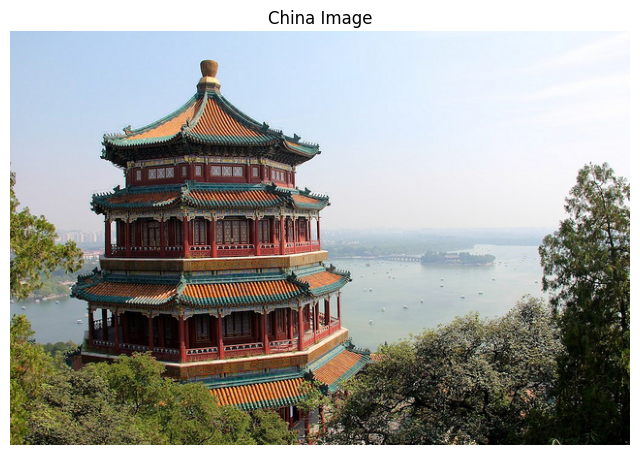

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(china)
plt.axis('off')
plt.title("China Image")
plt.show()

### ***Zadatak 2.1.***

Koliko piksela i različitih boja sadrži slika `china.jpg`?
> *Hint:* Za prebrojavanje boja možete proći kroz svaki piksel i spremiti njegovu boju. Pazite, boje se ponavljaju!

In [21]:
print(f"Number of pixels: {china.shape[0] * china.shape[1]}")

Number of pixels: 273280


In [22]:
china_colors = china.reshape(-1, 3)
print(f"Number of colors: {len(set(tuple(color) for color in china_colors))}")

Number of colors: 96615


### **Zadatak 2.2**

Za svaku od boja iz RGB kanala (crvena, zelena, plava) prikažite sliku `china.jpg` koristeći samo jedan od tih kanala.
> *Hint:* Za prikaz svakog od kanala, kopirajte originalnu sliku te postavite vrijednost ostalih kanala na 0 za svaki pixel.

In [23]:
china.shape

(427, 640, 3)

In [24]:
china_r = china.copy()
china_r[:,:,1] = 0
china_r[:,:,2] = 0

china_g = china.copy()
china_g[:,:,0] = 0
china_g[:,:,2] = 0

china_b = china.copy()
china_b[:,:,0] = 0
china_b[:,:,1] = 0

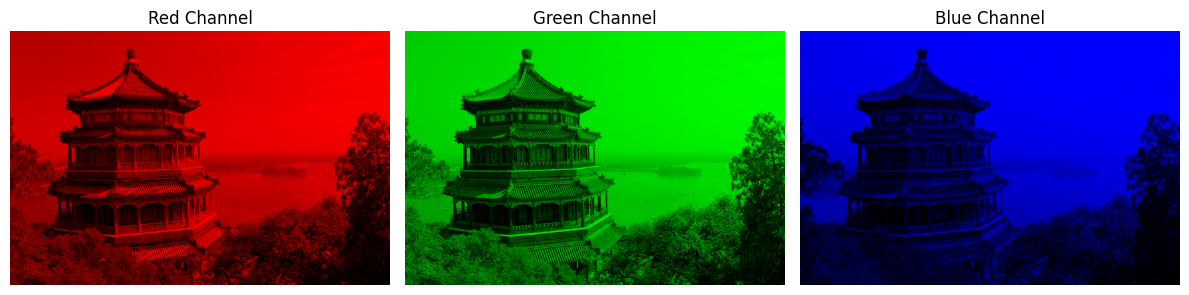

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(china_r)
plt.axis('off')
plt.title("Red Channel")

plt.subplot(1, 3, 2)
plt.imshow(china_g)
plt.axis('off')
plt.title("Green Channel")

plt.subplot(1, 3, 3)
plt.imshow(china_b)
plt.axis('off')
plt.title("Blue Channel")

plt.tight_layout()
plt.show()

###***Zadatak 2.3.***

Koristeći *k-means* algoritam kreirajte sliku na kojoj je broj boja reduciran na 32.

> *Hint*: Pazite da su vam podaci u rasponu 0 - 1, a ne 0 - 255!

In [26]:
k_means = KMeans(n_clusters=32, random_state=7)

china_reshaped = china.reshape(-1, 3)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
china_normalized = scaler.fit_transform(china_reshaped)

In [28]:
k_means.fit(china_normalized)

KMeans(n_clusters=32, random_state=7)

Text(0.5, 1.0, 'K-Means Clustering')

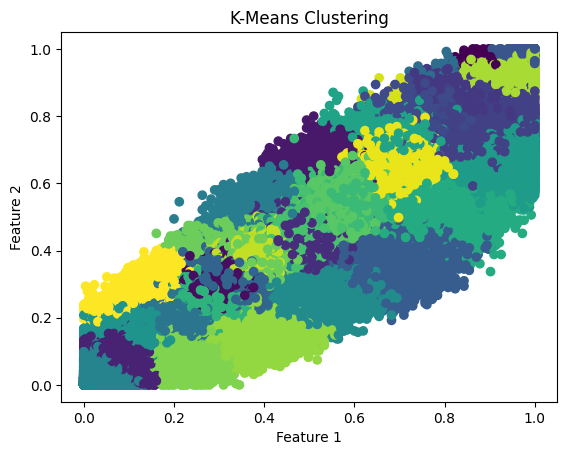

In [29]:
plt.scatter(china_normalized[:, 0], china_normalized[:, 1], c=k_means.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')

In [30]:
china_compressed = k_means.cluster_centers_[k_means.labels_]

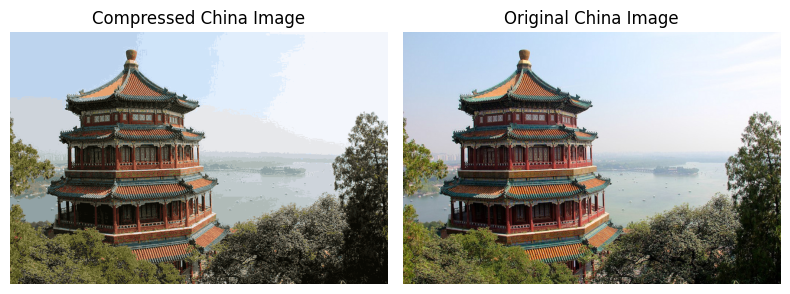

In [31]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(china_compressed.reshape(china.shape))
plt.axis('off')
plt.title("Compressed China Image")
plt.subplot(1, 2, 2)
plt.imshow(china)
plt.axis('off')
plt.title("Original China Image")
plt.tight_layout()

# ***Zadatak 3: Segmentacija slike***
Dana je fotografija M&M bombona `mm.jpg`. Na slici se nalaze bomboni u 6 različitih boja: crvena, narančasta, žuta, zelena, plava i smeđa.
Napravite segmentaciju slike koristeći k-means algoritam te izračunajte postotak svake od 6 nakupina koje algoritam odredi.

Što zaključujete? Koja boja M&Ma se pojavljuje najčešće, a koja najrjeđe na slici?

>***Napomena:*** Prilikom kreiranja Kmeans modela koristite *random_state = 7*.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
mm_img = plt.imread('/content/drive/MyDrive/mm.jpg')

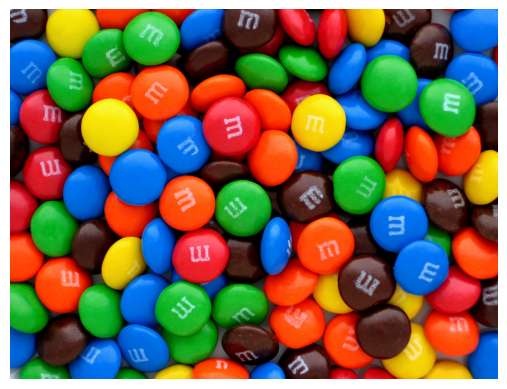

In [34]:
plt.imshow(mm_img)
plt.axis('off')
plt.show()

In [35]:
k_means = KMeans(n_clusters=6, random_state=7)

In [36]:
k_means.fit(mm_img.reshape(-1, 3))

KMeans(n_clusters=6, random_state=7)

In [46]:
segmented_img = k_means.cluster_centers_[k_means.labels_].reshape(mm_img.shape)
segmented_img = (segmented_img * 255).astype(np.uint8)

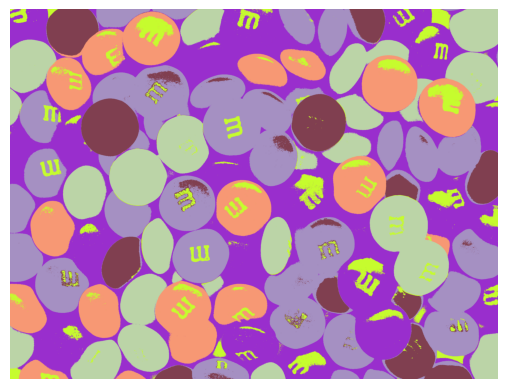

In [47]:
plt.imshow(segmented_img)
plt.axis('off')
plt.show()

In [48]:
predictions = k_means.predict(mm_img.reshape(-1, 3))

In [57]:
percentages = {0 : 0, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5}
for p in predictions:
  percentages[p] += 1

percentages = {k: v / len(predictions) for k, v in percentages.items()}

for color, percentage in percentages.items():
  print(f"Boja (cluster {color}): {percentage:.2%} ")

Boja (cluster 0): 5.56% 
Boja (cluster 1): 18.26% 
Boja (cluster 2): 8.99% 
Boja (cluster 3): 14.50% 
Boja (cluster 4): 25.28% 
Boja (cluster 5): 27.40% 
